In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pdb
%matplotlib inline


In [48]:
bezirke = [
    'charlottenburg-wilmersdorf',
    'friedrichshain-kreuzberg',
    'lichtenberg',
    'marzahn-hellersdorf',
    'mitte',
    'neukoelln',
    'pankow',
    'reinickendorf',
    'spandau',
    'steglitz-zehlendorf',
    'tempelhof-schoeneberg',
    'treptow-koepenick'
]
years = [2012, 2013, 2014, 2015, 2016]
data_path = '../data/raw/'

dfs = []
for year in years:
    for bezirk in bezirke:
        df = pd.read_csv( data_path + str(year) +'-'+ bezirk + '.csv', sep=';')
        df = df.dropna()
        df = df.assign(bezirk=bezirk, year=year)
        total_number_names = df['anzahl'].sum()
        df = df.assign(frequency = lambda df: df['anzahl']/total_number_names )
        #df_m = df[df['geschlecht']=='m']
        #print(df_m[ df_m['frequency'] == df_m['frequency'].max() ]['vorname'])
        dfs.append(df)
        
df = pd.concat(dfs)
#df = df.sort_values('anzahl', ascending=False )

In [49]:
df.head()

,anzahl,bezirk,frequency,geschlecht,vorname,year
0,122,charlottenburg-wilmersdorf,0.013676,w,Marie,2012
1,105,charlottenburg-wilmersdorf,0.011770,w,Sophie,2012
2,78,charlottenburg-wilmersdorf,0.008743,w,Charlotte,2012
3,69,charlottenburg-wilmersdorf,0.007735,w,Maria,2012
4,66,charlottenburg-wilmersdorf,0.007398,m,Paul,2012


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135989 entries, 0 to 1127
Data columns (total 6 columns):
anzahl        135989 non-null int64
bezirk        135989 non-null object
frequency     135989 non-null float64
geschlecht    135989 non-null object
vorname       135989 non-null object
year          135989 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 7.3+ MB


Most common names:  [('Marie', 'w'), ('Sophie', 'w'), ('Alexander', 'm'), ('Charlotte', 'w'), ('Maria', 'w'), ('Paul', 'm'), ('Maximilian', 'm'), ('Emilia', 'w'), ('Elias', 'm'), ('Emma', 'w')]


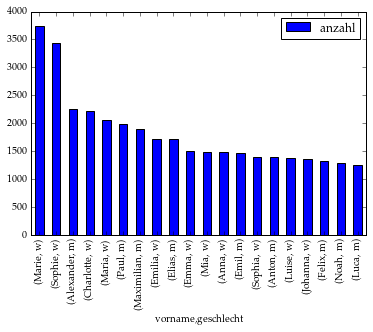

In [51]:
# Group names, calculate most common nampes
dfgroup = df[['year','vorname','anzahl','geschlecht']].groupby(by=['vorname', 'geschlecht']).sum()
dfgroup = dfgroup.sort_values('anzahl', ascending=False)
#dfgroup.assign(name = dfgroup.index)
#plt.bar(dfgroup[0:10].index, dfgroup['anzahl'][0:10])
dfgroup[0:20].plot.bar(y='anzahl')
most_common_names = list(dfgroup[0:20].index)
print('Most common names: ', most_common_names[0:10])
#dfgroup.index
#for vorname in dfgroup['vorname'].unique():
#    nameseries = dfgroup[dfgroup['vorname'] == vorname]
#    plt.plot(nameseries['Year'], nameseries['anzahl'], label=vorname )

In [52]:
# Calculate the mean frequency of the most common names per year
mean_freqs = pd.DataFrame(columns=['vorname', 'year', 'mean_freq', 'geschlecht'])
for name, geschlecht in most_common_names: #df['vorname'].unique():
    for year in df['year'].unique():
        mean_freq = df[ (df['vorname'] == name) & (df['year']==year) & (df['geschlecht']==geschlecht)]['frequency'].mean()
#        mean_freqs.append(pd.DataFrame([name, year, mean_freq]))
        mean_freqs.loc[mean_freqs.shape[0]] = [name, year, mean_freq, geschlecht]

mean_freqs['id'] = mean_freqs['vorname'] + mean_freqs['geschlecht'] + mean_freqs['year'].map(int).map(str)
#mean_freqs['id'].apply(lambda x: str(x['vorname']) + str(x['year']))
mean_freqs.head(10)

,vorname,year,mean_freq,geschlecht,id
0,Marie,2012.0,0.012783,w,Mariew2012
1,Marie,2013.0,0.011896,w,Mariew2013
2,Marie,2014.0,0.011554,w,Mariew2014
3,Marie,2015.0,0.012445,w,Mariew2015
4,Marie,2016.0,0.010603,w,Mariew2016
5,Sophie,2012.0,0.012550,w,Sophiew2012
6,Sophie,2013.0,0.011471,w,Sophiew2013
7,Sophie,2014.0,0.011502,w,Sophiew2014
8,Sophie,2015.0,0.010157,w,Sophiew2015
9,Sophie,2016.0,0.009063,w,Sophiew2016


In [53]:
# Add mean_freq to df (RUN ONLY ONCE)
df['id'] = df['vorname'] + df['geschlecht'] + df['year'].map(str)
df = pd.merge(df, mean_freqs[['mean_freq','id']], on='id', how='outer')
df.head()

,anzahl,bezirk,frequency,geschlecht,vorname,year,id,mean_freq
0,122,charlottenburg-wilmersdorf,0.013676,w,Marie,2012,Mariew2012,0.012783
1,66,friedrichshain-kreuzberg,0.010563,w,Marie,2012,Mariew2012,0.012783
2,53,lichtenberg,0.011822,w,Marie,2012,Mariew2012,0.012783
3,21,marzahn-hellersdorf,0.012696,w,Marie,2012,Mariew2012,0.012783
4,83,mitte,0.010241,w,Marie,2012,Mariew2012,0.012783


In [ ]:
# Änderung in Prozent 2012 zu 2016
#trend = mean_freqs.group
trend_df = pd.DataFrame(columns=['vorname', 'geschlecht', 'bezirk', 'trend'])
for name, geschlecht in most_common_names:
    for bezirk in bezirke:
        freq_2012 = df[ (df['vorname'] == name) & (df['year']==2012) & (df['geschlecht']==geschlecht) & (df['bezirk']==bezirk)].mean_freq
        freq_2016 = df[ (df['vorname'] == name) & (df['year']==2016) & (df['geschlecht']==geschlecht) & (df['bezirk']==bezirk)].mean_freq
        f_2012 = 0 if (freq_2012.shape[0] == 0) else freq_2012[0]
        f_2016 = 0 if (freq_2016.shape[0] == 0) else freq_2016[0]
        if f_2012 != 0:
            trend = (f_2016 - f_2012)/f_2012
        else:
            trend = np.inf
        trend_df.loc[trend_df.shape[0]] = [name, geschlecht, bezirk, trend]
        

trend_df.head()

### Ungewöhnlich häufige Vornamen

In [22]:
df['freq_dev'] = (df['frequency'] - df['mean_freq']) / df['mean_freq']
df_freq = df.sort_values('freq_dev', ascending=False)
df_freq[(df_freq['bezirk']=='reinickendorf') & (df_freq['year']==2016) & (df_freq['frequency']>0.0)].dropna()

,anzahl,bezirk,frequency,geschlecht,vorname,year,id,mean_freq,freq_dev
108110,9,reinickendorf,0.004891,w,Maja,2016,Majaw2016,0.001627,2.006182
111634,7,reinickendorf,0.003804,m,Lennard,2016,Lennardm2016,0.001306,1.913295
109369,6,reinickendorf,0.003261,m,Can,2016,Canm2016,0.001147,1.843824
108332,9,reinickendorf,0.004891,w,Lara,2016,Laraw2016,0.001917,1.551111
108309,9,reinickendorf,0.004891,w,Elif,2016,Elifw2016,0.002040,1.397940
112386,4,reinickendorf,0.002174,m,Emir,2016,Emirm2016,0.000929,1.340258
107561,9,reinickendorf,0.004891,w,Katharina,2016,Katharinaw2016,0.002119,1.308200
109510,6,reinickendorf,0.003261,m,Muhammed,2016,Muhammedm2016,0.001414,1.305625
109532,4,reinickendorf,0.002174,m,Robert,2016,Robertm2016,0.000984,1.210202
107514,9,reinickendorf,0.004891,w,Leonie,2016,Leoniew2016,0.002432,1.011549


In [ ]:
plt.step(x=range(len(dfgroup)),y=dfgroup[ dfgroup['anzahl']>0]['anzahl'])
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

In [ ]:
dfgroup2 = df[['Year', 'vorname', 'anzahl']].groupby(by=['vorname', 'Year']).sum()
#dfgroup2 = df[['Year', 'vorname', 'anzahl']].groupby(['vorname', 'Year']).sum().groupby('Year')

#dfgroup2.reset_index()
dfgroup2 = dfgroup2.sort_values('anzahl', ascending=False)
best_names = dfgroup2.index.get_level_values('vorname').unique()[0:10]
#years = dfgroup2.index.get_level_values('Year').unique()
#dfgroup2.iloc[ dfgroup2.index['Year']==2015 ]

#dfgroup2.loc['Marie'].sort_index()
for name in best_names:
    #dfgroup2.loc[name].sort_index().plot.line() 
    plt.plot(dfgroup2.loc[name].sort_index(), label=name)
plt.legend(loc='right')
#dfgroup2.iloc[dfgroup2.index.get_level_values('Year') == 2015]

In [ ]:
dfgroup.head()

In [ ]:
dfgroup = df.groupby(by=['Year', 'Bezirk', 'vorname']).sum()
dfgroup.head(10)